In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# 2. Đọc file csv và gắng index với giá Close
csv_akam = "C:/Business analysis/Project/IS403.O22.HTCLL_Nhom07/Dataset/AKAM_Stock.csv"
df = pd.read_csv(csv_akam, thousands=',')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1)-train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - loss: 0.1670 - val_loss: 0.0134
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0176 - val_loss: 0.0102
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0102 - val_loss: 0.0078
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0075 - val_loss: 0.0061
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0065 - val_loss: 0.0049
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0059 - val_loss: 0.0047
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0052 - val_loss: 0.0053
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0055 - val_loss: 0.0045
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0058 - val_loss: 0.0045
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0055 - val_loss: 0.0044
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [12]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 102.50580289310733


In [13]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_30=[]
n_steps=x_input.shape[1]
i=0
while(i<30):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_30.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_30.extend(yhat.tolist())
        i=i+1


[0.3847125]
339
1 day input [0.33496609 0.34560807 0.37432423 0.34138509 0.31030395 0.32162161
 0.28902026 0.2802364  0.27668912 0.31841211 0.31537157 0.16114865
 0.13429048 0.13817567 0.12297294 0.13057424 0.10185808 0.06064183
 0.07060811 0.05878371 0.06638514 0.07415539 0.11030402 0.0983108
 0.09459456 0.08935812 0.07736476 0.04797291 0.02753374 0.04577701
 0.04763513 0.05760128 0.07584455 0.10168912 0.11114854 0.08496619
 0.10016892 0.11706081 0.12246621 0.12601349 0.1285473  0.12550675
 0.15506756 0.14797287 0.14273642 0.14003379 0.16554045 0.15388513
 0.19594591 0.20371616 0.23733099 0.2268581  0.23327697 0.23141885
 0.22094583 0.1981418  0.19966214 0.19476348 0.17483104 0.16182421
 0.2128378  0.21706077 0.19290536 0.16621614 0.1577702  0.13378374
 0.15945936 0.17280397 0.16486476 0.27736481 0.28378368 0.27364858
 0.28378368 0.29983106 0.29814177 0.31503366 0.30658771 0.3180742
 0.30253369 0.31283776 0.33682421 0.362331   0.38834453 0.38851348
 0.37719582 0.4119932  0.41756743 0.

In [14]:
# 13. Dự báo 60 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
n_steps=x_input.shape[1]
i=0
while(i<60):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1


[0.3847125]
339
1 day input [0.33496609 0.34560807 0.37432423 0.34138509 0.31030395 0.32162161
 0.28902026 0.2802364  0.27668912 0.31841211 0.31537157 0.16114865
 0.13429048 0.13817567 0.12297294 0.13057424 0.10185808 0.06064183
 0.07060811 0.05878371 0.06638514 0.07415539 0.11030402 0.0983108
 0.09459456 0.08935812 0.07736476 0.04797291 0.02753374 0.04577701
 0.04763513 0.05760128 0.07584455 0.10168912 0.11114854 0.08496619
 0.10016892 0.11706081 0.12246621 0.12601349 0.1285473  0.12550675
 0.15506756 0.14797287 0.14273642 0.14003379 0.16554045 0.15388513
 0.19594591 0.20371616 0.23733099 0.2268581  0.23327697 0.23141885
 0.22094583 0.1981418  0.19966214 0.19476348 0.17483104 0.16182421
 0.2128378  0.21706077 0.19290536 0.16621614 0.1577702  0.13378374
 0.15945936 0.17280397 0.16486476 0.27736481 0.28378368 0.27364858
 0.28378368 0.29983106 0.29814177 0.31503366 0.30658771 0.3180742
 0.30253369 0.31283776 0.33682421 0.362331   0.38834453 0.38851348
 0.37719582 0.4119932  0.41756743 0.

In [15]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
n_steps=x_input.shape[1]
i=0
while(i<90):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1


[0.3847125]
339
1 day input [0.33496609 0.34560807 0.37432423 0.34138509 0.31030395 0.32162161
 0.28902026 0.2802364  0.27668912 0.31841211 0.31537157 0.16114865
 0.13429048 0.13817567 0.12297294 0.13057424 0.10185808 0.06064183
 0.07060811 0.05878371 0.06638514 0.07415539 0.11030402 0.0983108
 0.09459456 0.08935812 0.07736476 0.04797291 0.02753374 0.04577701
 0.04763513 0.05760128 0.07584455 0.10168912 0.11114854 0.08496619
 0.10016892 0.11706081 0.12246621 0.12601349 0.1285473  0.12550675
 0.15506756 0.14797287 0.14273642 0.14003379 0.16554045 0.15388513
 0.19594591 0.20371616 0.23733099 0.2268581  0.23327697 0.23141885
 0.22094583 0.1981418  0.19966214 0.19476348 0.17483104 0.16182421
 0.2128378  0.21706077 0.19290536 0.16621614 0.1577702  0.13378374
 0.15945936 0.17280397 0.16486476 0.27736481 0.28378368 0.27364858
 0.28378368 0.29983106 0.29814177 0.31503366 0.30658771 0.3180742
 0.30253369 0.31283776 0.33682421 0.362331   0.38834453 0.38851348
 0.37719582 0.4119932  0.41756743 0.

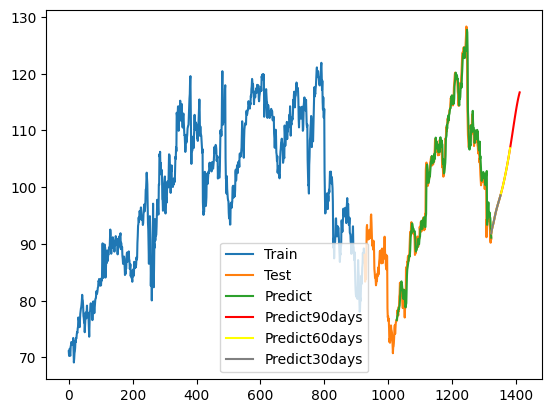

In [16]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_data_index_90 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output_90), color='red')
predict_data_index_60 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output_60), color='yellow')
predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output_30), color='grey')
plt.legend(['Train','Test','Predict','Predict90days', 'Predict60days', 'Predict30days'])
plt.show()